In [57]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

# Data Pred

In [58]:
x_value = [i for i in range(11)]
x_train = np.array(x_value, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_value = [2*i + 1 for i in x_value]
y_train = np.array(y_value, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [59]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

# Model Prep

In [60]:
inputDim = 1       
outputDim = 1       
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
model

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

# Train Prep

In [61]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [62]:
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    print(loss)

    loss.backward()

    optimizer.step()

    print(f'epoch {epoch}, loss {loss.item()}')


tensor(318.1559, grad_fn=<MseLossBackward0>)
epoch 0, loss 318.1558837890625
tensor(25.9517, grad_fn=<MseLossBackward0>)
epoch 1, loss 25.951698303222656
tensor(2.1175, grad_fn=<MseLossBackward0>)
epoch 2, loss 2.1175179481506348
tensor(0.1734, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.17343004047870636
tensor(0.0148, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.014848891645669937
tensor(0.0019, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.0019061840139329433
tensor(0.0008, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.0008427494904026389
tensor(0.0007, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.0007483091321773827
tensor(0.0007, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.0007330288644880056
tensor(0.0007, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.0007242826395668089
tensor(0.0007, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.00071614736225456
tensor(0.0007, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.0007081420626491308
tensor(0.0007, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.00

# Test performance

In [63]:
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 1.030202 ]
 [ 3.0258527]
 [ 5.0215034]
 [ 7.0171537]
 [ 9.012805 ]
 [11.008455 ]
 [13.004106 ]
 [14.999757 ]
 [16.995407 ]
 [18.991058 ]
 [20.98671  ]]


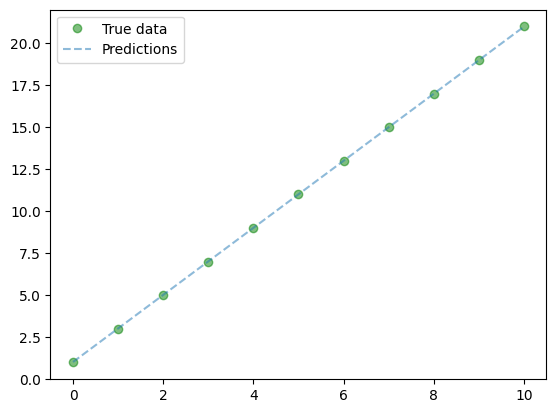

In [64]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()